## IMPORTING

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
df1 = pd.read_csv('diabetes_pm_in.csv')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df1['Outcome'].unique()

array([1, 0])

## NULL VALUES

In [13]:
#the values for the following columns can't be 0, thus I convert them to null as they are missing values
df1["Glucose"] = df1['Glucose'].replace(0, np.nan)
df1["BloodPressure"] = df1['BloodPressure'].replace(0, np.nan)
df1["SkinThickness"] = df1['Glucose'].replace(0, np.nan)
df1["Insulin"] = df1['BloodPressure'].replace(0, np.nan)
df1["BMI"] = df1['BMI'].replace(0, np.nan)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             763 non-null    float64
 4   Insulin                   733 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [19]:
df1 = df1.dropna(subset=['Glucose', 'SkinThickness'])

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             728 non-null    float64
 3   SkinThickness             763 non-null    float64
 4   Insulin                   728 non-null    float64
 5   BMI                       752 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 59.6 KB


>mean 0.763 (0.042)
>median 0.770 (0.048)
>most_frequent 0.764 (0.039)


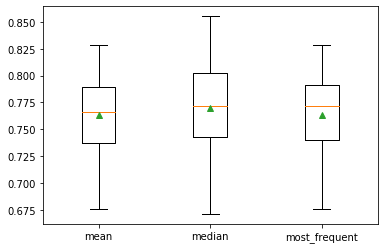

In [23]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]


results = list()
strategies = ['mean', 'median', 'most_frequent']
for s in strategies:
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [33]:
# from sklearn.impute import KNNImputer

model = RandomForestClassifier()
imputer = KNNImputer(n_neighbors=4, weights="uniform")
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.768 (0.041)


In [ ]:
from sklearn.model_selection import train_test_split

X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

imp = SimpleImputer(strategy='Mean')
imputer.fit(X_train)
Xtrans = imputer.transform(X_train)

## DATA IMBALANCE

In [3]:
pos = df1[(df1['Outcome'] == 1)]
print(pos.shape)
neg = df1[(df1['Outcome'] == 0)]
print(neg.shape)

(268, 9)
(500, 9)


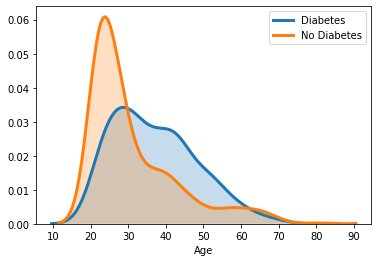

In [5]:
sns.distplot(pos['Age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Diabetes')
sns.distplot(neg['Age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'No Diabetes')
plt.savefig('age 1.png')

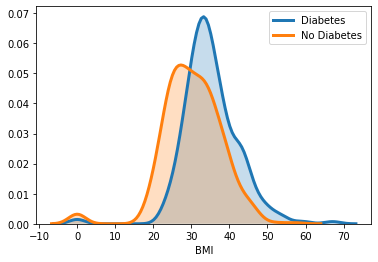

In [6]:
sns.distplot(pos['BMI'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Diabetes')
sns.distplot(neg['BMI'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'No Diabetes')
plt.savefig('BMI 1.png')

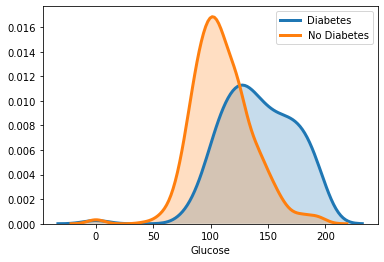

In [4]:
sns.distplot(pos['Glucose'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'Diabetes')
sns.distplot(neg['Glucose'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = 'No Diabetes')
plt.savefig('glucose 1.png')

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 25))

sns.lineplot(x=data.DateTime, y=data.Value, ax=ax[0], color='dodgerblue')
ax[0].set_title('Glucose Level', fontsize=14)
ax[0].set_ylabel(ylabel='Glucose value', fontsize=14)

## DATA ANALYSIS

In [17]:
print(df1.shape)
print(df1.info())
df1.describe()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
pos = df1[(df1['Outcome'] == 1)]
print(pos.shape)
neg = df1[(df1['Outcome'] == 0)]
print(neg.shape)

(268, 9)
(500, 9)


## NULL

In [19]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Correlation Matrix

In [20]:
matrix = df1.corr()
print(matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

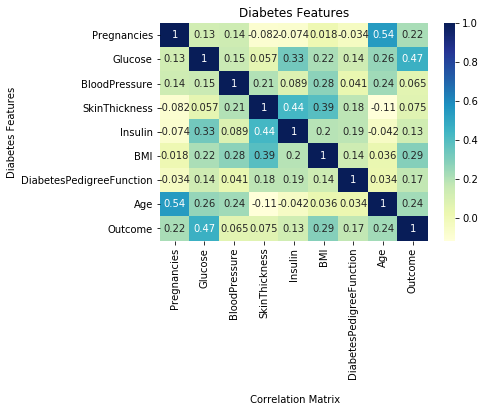

In [21]:
hm = sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")

hm.set(xlabel='\n Correlation Matrix', ylabel='Diabetes Features', title = "Diabetes Features")

plt.show()

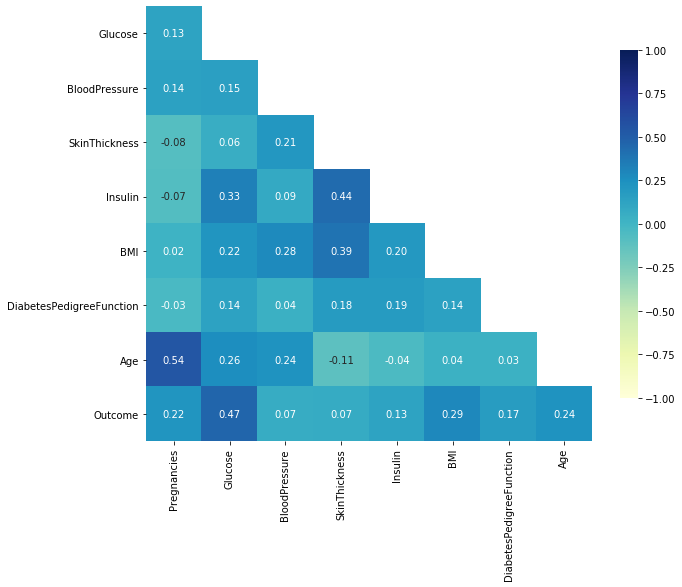

<Figure size 432x288 with 0 Axes>

In [12]:
df_corr = df1.corr()
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
#sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='YlGnBu', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()
plt.savefig("corr1.png")

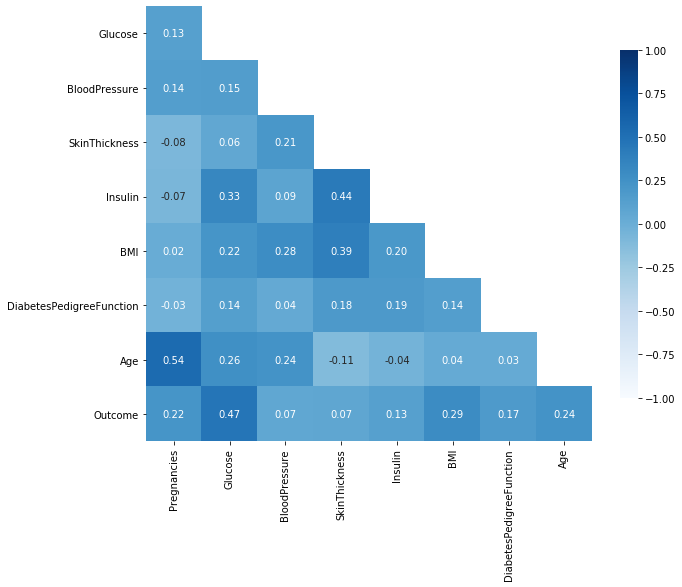

In [23]:
df_corr = df1.corr()
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
#sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='YlGnBu', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [24]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df1.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("HIGHEST CORRELATION:")
print(get_top_abs_correlations(df1))

def get_bottom_abs_correlations(df, n=5):
    au_corr = df1.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

print("\n")
print("LOWEST CORRELATION:")
print(get_bottom_abs_correlations(df1))

HIGHEST CORRELATION:
Pregnancies    Age        0.544341
Glucose        Outcome    0.466581
SkinThickness  Insulin    0.436783
               BMI        0.392573
Glucose        Insulin    0.331357
dtype: float64


LOWEST CORRELATION:
Pregnancies               BMI                         0.017683
                          DiabetesPedigreeFunction    0.033523
DiabetesPedigreeFunction  Age                         0.033561
BMI                       Age                         0.036242
BloodPressure             DiabetesPedigreeFunction    0.041265
dtype: float64


### Highest correlation with outcome is: <br>
#### glucose 0.47 <br>
#### BMI 0.29 <br>
#### age 0.24 <br>
#### pregnancies 0.22

### Lowest correlation with outcome is: <br>
#### blood pressure 0.07 <br>
#### skin thickness 0.07 <br>

In [ ]:
df1.boxplot(figsize = (20,10), )

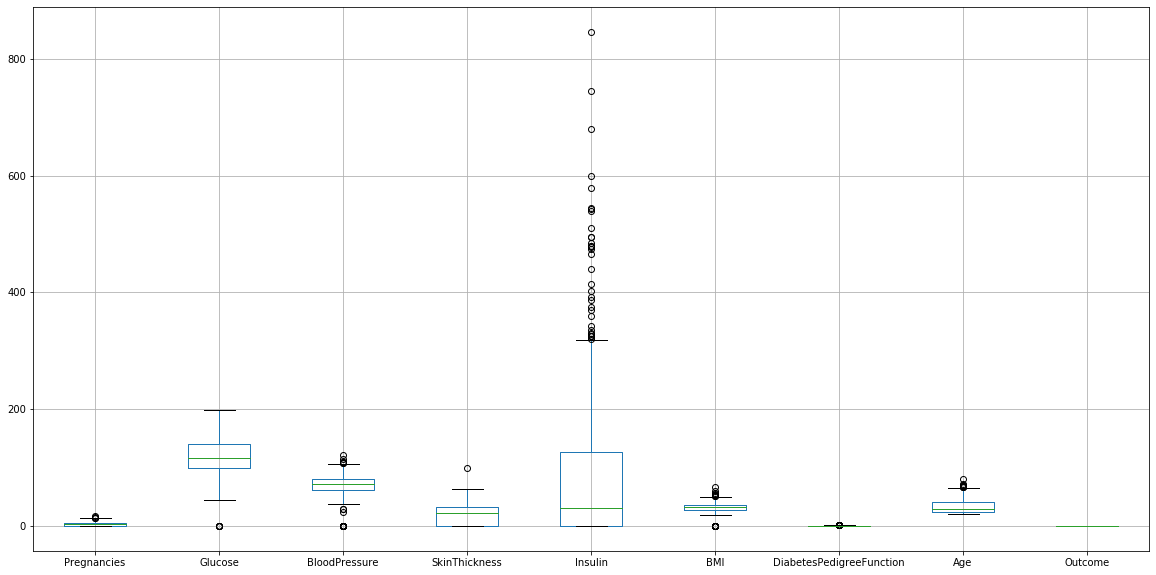

In [25]:
df1.boxplot(figsize = (20,10))

In [7]:
d = pd.read_csv('diabetes_pm_in.csv')

In [8]:
d = d.astype({"Outcome": str})

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


/Users/juliasulstarova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


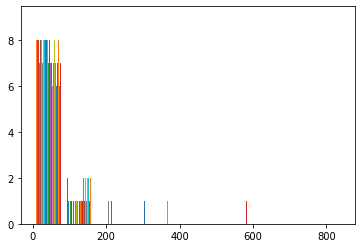

In [58]:
fig = plt.hist(df1,normed=0)
#plt.title('Mean')
#plt.xlabel("value")
#plt.ylabel("Frequency")
#plt.savefig("abc.png")

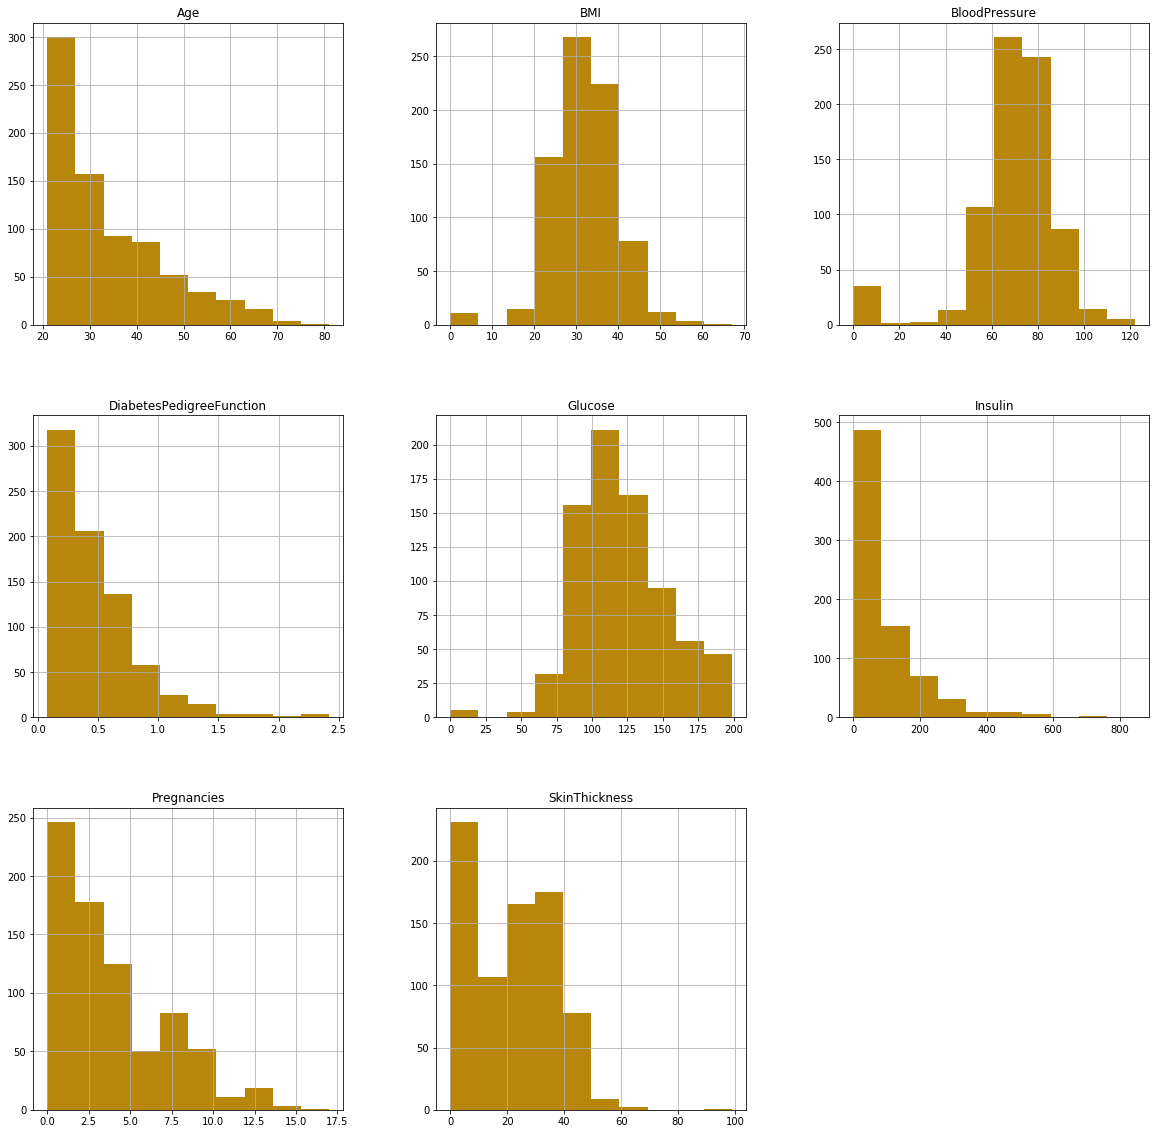

In [10]:
d.hist(figsize = (20,20), color = 'darkgoldenrod', grid=True)
plt.savefig('fig1.png')

In [56]:
a

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4c6ffd470>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4e1328a90>,
      dtype=object)

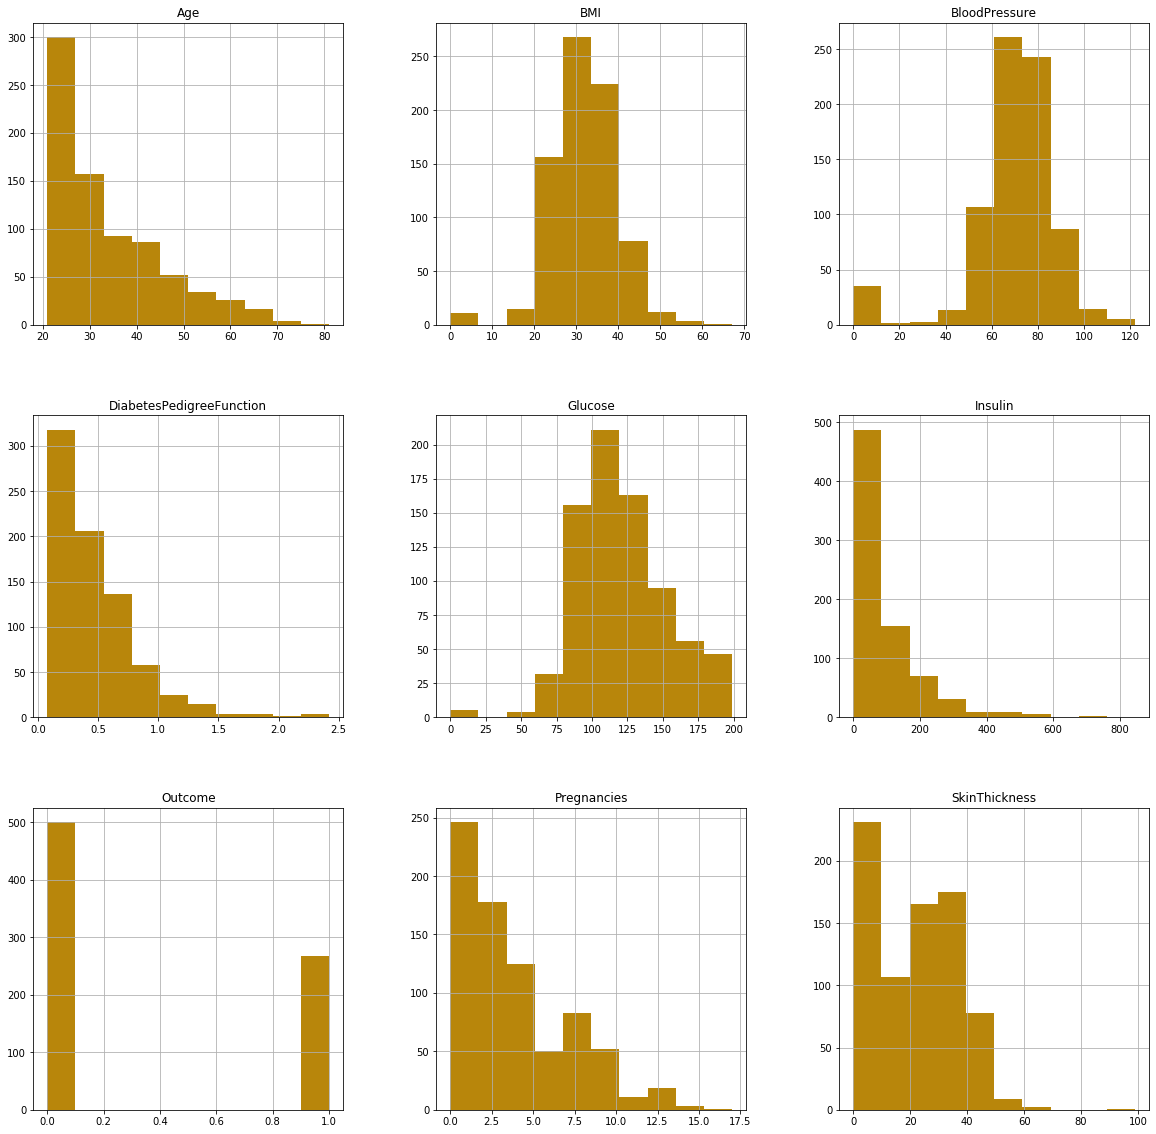

In [27]:
df1.hist(figsize = (20,20), color = 'darkgoldenrod', grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba3c6fe780>,
      dtype=object)

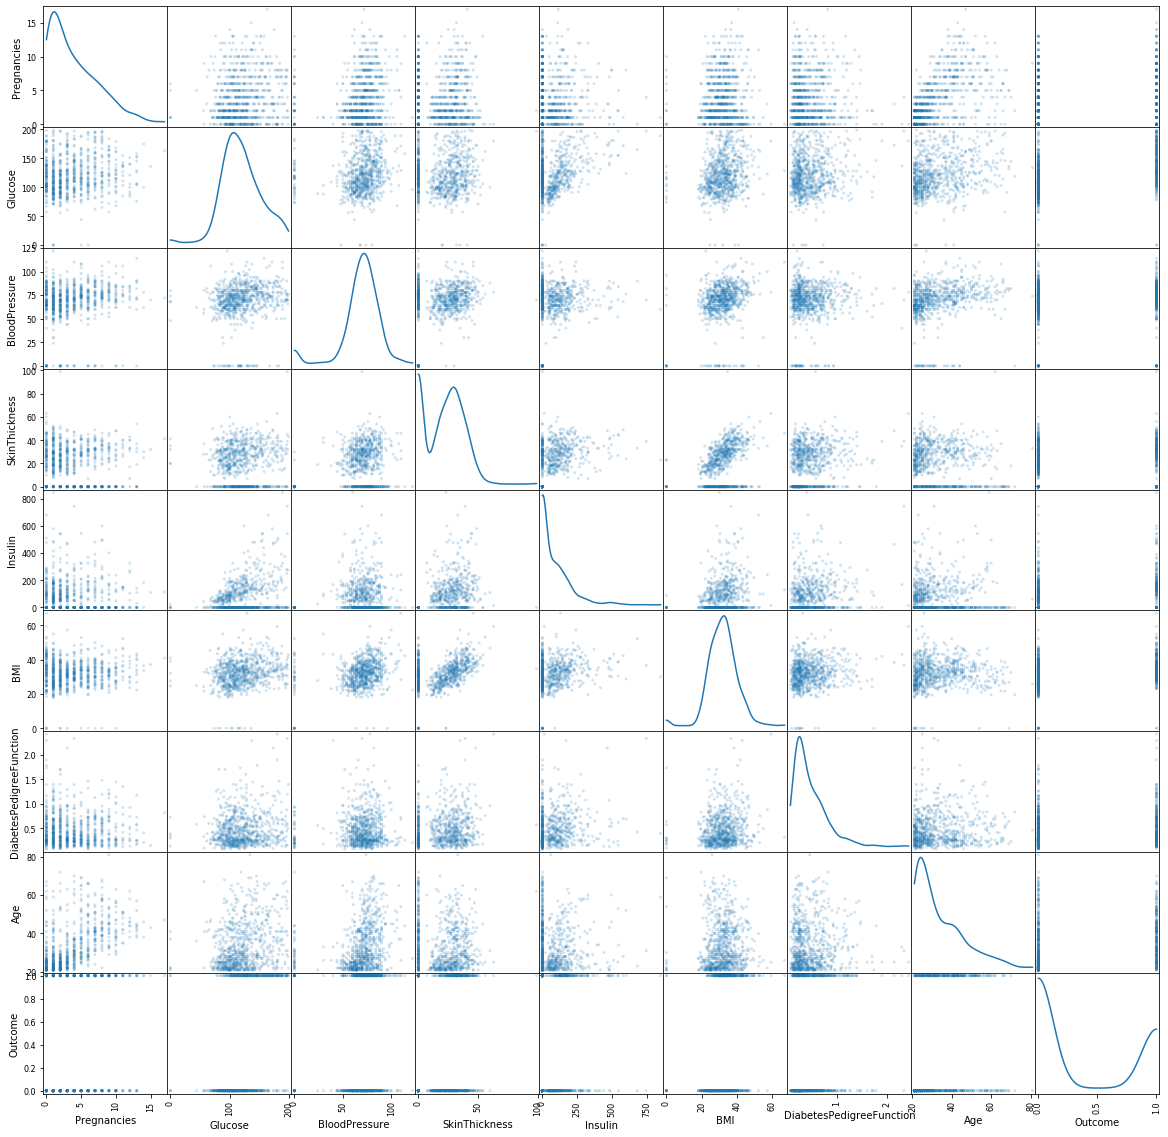

In [27]:
a = scatter_matrix(df1, alpha=0.2, figsize=(20, 20), diagonal='kde')
a

In [28]:
dict = {}
for i in list(df1.columns):
    dict[i] = df1[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


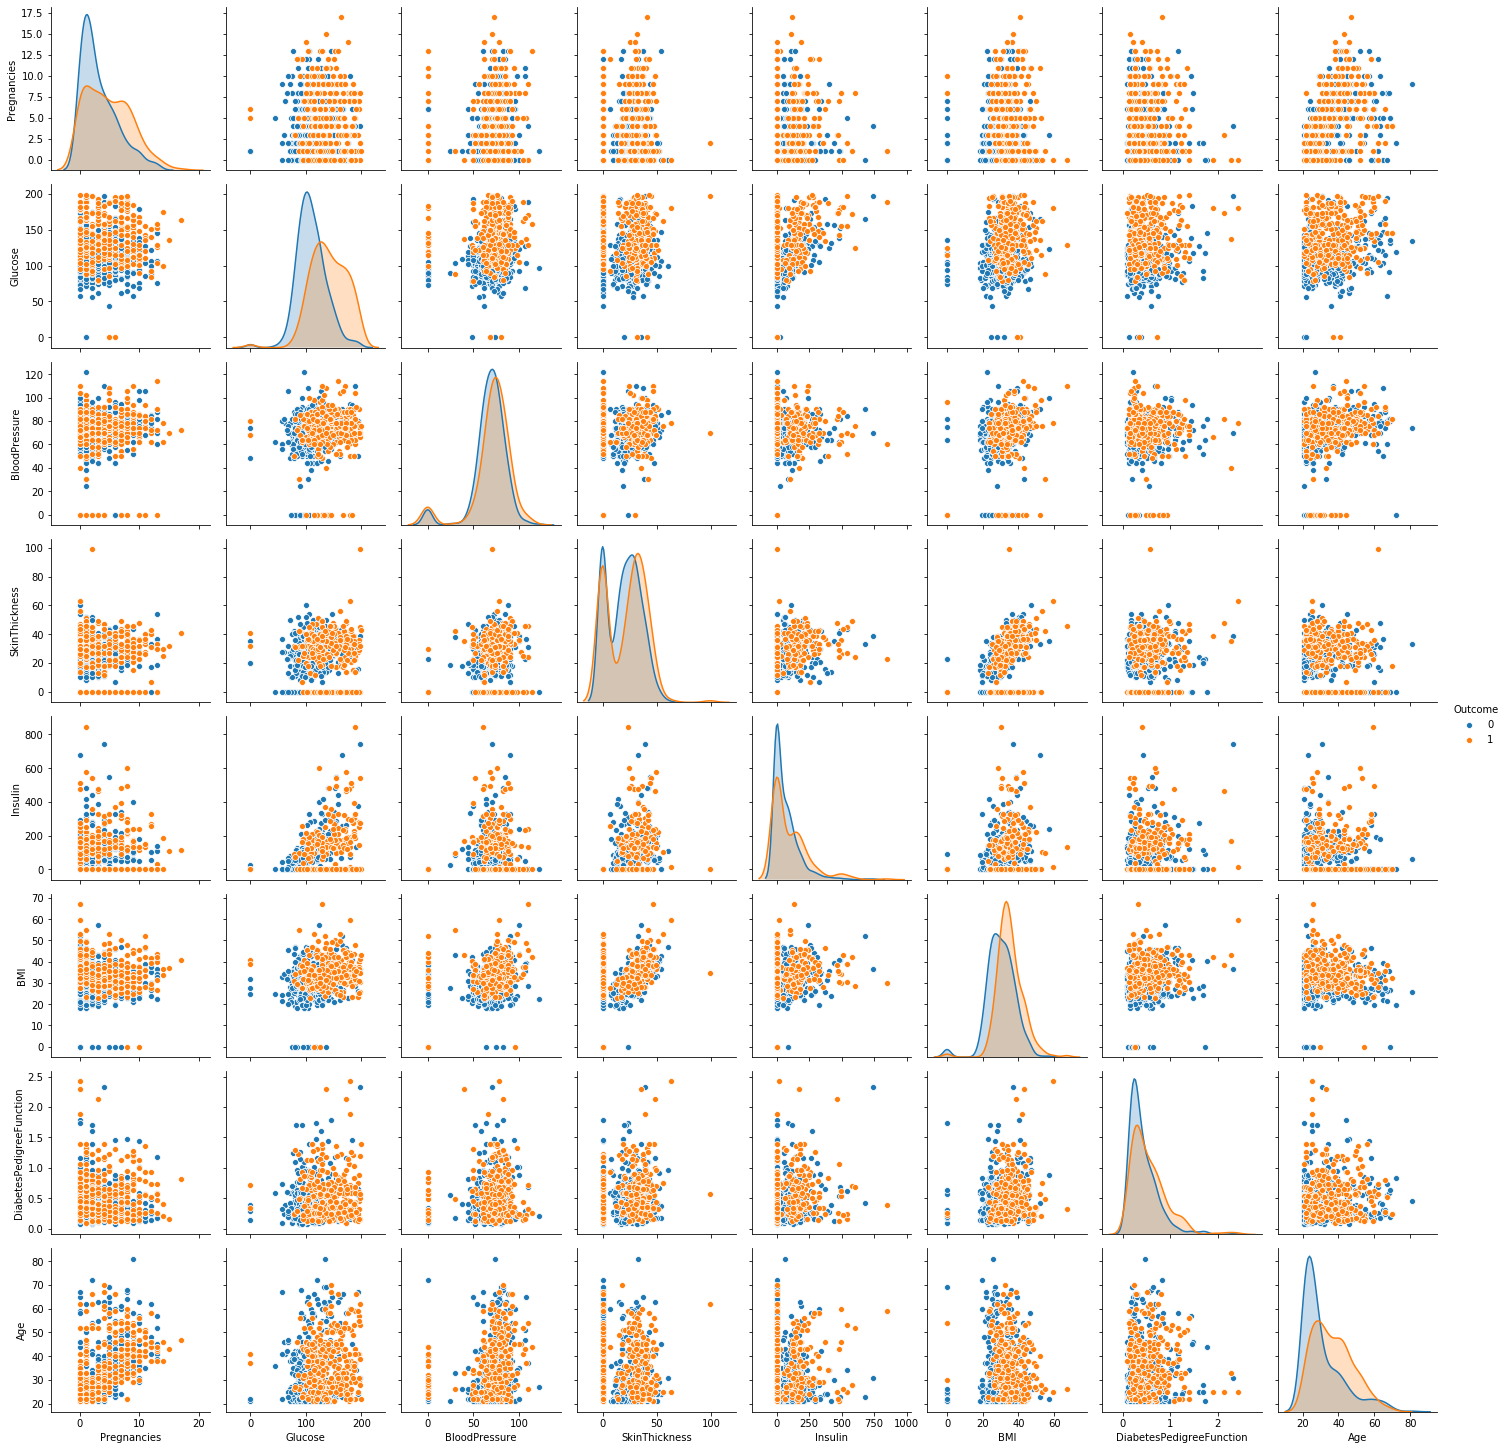

In [31]:
sns.pairplot(data=df1, hue="Outcome")

https://www.kaggle.com/code/mushfirat/stroke-prediction-dataset-eda